# Linearna regresija

**Linearna regresija** predstavlja nalaženje linearne veze između nezavisne promenljive $x$ i zavisne promenljive $y$. Ukoliko je promenljiva $x$ skalar, radi se o prostoj linearnoj regresiji, a ako je promenljiva $x$ vektor, reč je o linearnoj regresiji za funkciju više promenljivih. U oba slučaja, pretpostavka je da je zavisna promenljiva $y$ skalar.

**Prosta linearna regresija** predstavlja nalaženje linearne veze između parova skalara $(x_i, y_i)$, $1 \le i \le n$. Veza je data linearnom funkcijom $f(x) = \beta_0 + \beta_1 x$, gde su $\beta_0$ i $\beta_1$ parametri koje treba odrediti. Ako je $X=[x_1, \dots, x_n]$ i $Y=[y_1, \dots, y_n]$, izraz se može zapisati u matričnom obliku kao $\begin{bmatrix}1&X\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\\beta_1\end{bmatrix} = Y$, gde je $\begin{bmatrix}1&X\end{bmatrix}$ matrica čija se prva kolona sastoji samo od jedinica, a druga kolona je vektor $X$.

**Linearna regresija za funkciju više promenljivih** predstavlja nalaženje linearne veze između parova vektora i skalara $(X_i, y_i)$, $1 \le i \le n$. Veza je data linearnom funkcijom $f(x_1,\dots,x_m) = \beta_0 + \beta_1 x_1 + \dots + \beta_m x_m$, gde su $\beta_0, \dots, \beta_1$ parametri koje treba odrediti. Izraz se zapisati u matričnom obliku kao $\begin{bmatrix}1&X_1&\cdots&X_m\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\ \vdots \\ \beta_m\end{bmatrix} = Y$, gde je $\begin{bmatrix}1&X_1&\cdots&X_m\end{bmatrix}$ matrica čija se prva kolona sastoji samo od jedinica, a ostale kolone su redom vektori $X_1,\dots,X_m$. 

Sistem jednačina $\begin{bmatrix}1&X\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\\beta_1\end{bmatrix} = Y$ kod proste linearne regresije, odnosno $\begin{bmatrix}1&X_1&\cdots&X_m\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\ \vdots \\ \beta_m\end{bmatrix} = Y$ kod linearne regresije za funkciju više promenljivih, se najčešće rešava **metodom najmanjih kvadrata**. Takav sistem u praksi obično ima više jednačina nego promenljivih i najčešće nema egzaktno rešenje.

Ako sistem napišemo u obliku $A\beta = Y$, njegovo rešavanje predstavlja nalaženje onog vektora $\beta$ za koji je vrednost izraza $||Y - \beta A||_2^2$ najmanja. Ovde je sa $||a||_2 = \sqrt{a_1^2 + a_2^2 + \dots + a_n^2}$ označena 2-norma vektora $a = (a_1, a_2, \dots, a_n)$. Rešenje je dato u obliku $\beta=(A^{T}A)^{-1}A^{T}Y$, gde se matrica $(A^{T}A)^{-1}A^{T}$ se naziva pseudoinverz matrice $A$.

U slučaju proste linearne regresije, može se pokazati da je $$\beta_1 = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}$$ i $\beta_0 = \bar{y} - \beta_1 \bar{x}$, gde je $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$ aritmetička sredina nezavisnih, a $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$ zavisnih promenljivih.

Funkcija `lstsq` iz `numpy.linalg` paketa određuje rešenje sistema jednačina metodom najmanjih kvadrata. Ukoliko postoji rešenje, vraća se njegova vrednost. Inače, vrši se minimizacija $\min_{\beta} ||Y - \beta A||_2^2$. Prva dva argumenta su redom matrica $A$ i vektor $Y$, a treći argument se odnosi na odbacivanje malih singularnih vrednosti matrice. On će u narednim primerima biti postavljen na `None`. Povratne vrednosti su, redom, rešenje, ostatak, rang matrice i singularne vrednosti. 

In [1]:
import numpy as np
from numpy import linalg as LA

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

**Primeri**

**1.** Rešiti sledeći sistem jednačina dat u matričnom obliku: $$\begin{bmatrix}2&0\\-1&1\\0&2\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}2\\0\\-2\end{bmatrix}.$$

**Rešenje.** Iz prve jednačine sledi da je $x_1 = 1$, iz poslednje $x_2 = -1$, a iz druge $x_1 = x_2$, što je kontradikcija, pa sistem nema rešenja. Rešavanje ovog sistema predstavlja nalaženje vrednosti $x_1$ i $x_2$ koja minimizuje ostatak u smislu metode najmanjih kvadrata. Zadatak će biti urađen na dva načina $-$ direktno preko formule i korišćenjem funkcije `lstsq`.

Prvi način:

In [4]:
A = np.array([[2,0], [-1,1], [0,2]])
b = np.array([2, 0, -2]).T
x = LA.inv(A.T.dot(A)).dot(A.T).dot(b)
# rss je skracenica od residual square sum
rss = LA.norm(b - A.dot(x)) ** 2
print('Resenje: x1 =', x[0], 'x2 =', x[1])
print('Ostatak:', rss)

Resenje: x1 = 0.6666666666666667 x2 = -0.6666666666666667
Ostatak: 2.6666666666666665


Drugi način:

In [5]:
x, rss, _, _ = LA.lstsq(A, b, rcond=None)
print('Resenje: x1 =', x[0], 'x2 =', x[1])
# ostatak je dat inace u obliku niza
print('Ostatak:', rss[0])

Resenje: x1 = 0.6666666666666665 x2 = -0.6666666666666669
Ostatak: 2.666666666666666


**2.** Odrediti koeficijente $\beta_0$ i $\beta_1$ tako da funkcija $f(x) = \beta_0 + \beta_1 x$ u smislu metode najmanjih kvadrata najbolje aproksimira skup tačaka $(0, 1.2)$, $(0.5, 2.05)$, $(1, 2.9)$ i $(-0.5, 0.1)$ u ravni.

**Rešenje.** Neka su $(x_i, y_i)$, $1 \le i \le 4$ redom parovi tačaka. Nalaženje vrednosti koeficijenata predstavlja rešavanje sistema jednačina $A\beta = y$, gde je $A = \begin{bmatrix}1&x_1\\1&x_2\\1&x_3\\1&x_4\end{bmatrix}$, $\beta = \begin{bmatrix}\beta_0\\ \beta_1\end{bmatrix}$ i $y = \begin{bmatrix}y_1\\y_2\\y_3\\y_4\end{bmatrix}$. Zadatak će biti rešen na tri načina $-$ koristeći funkciju `lstsq`, nalaženjem pseudoinverza i eksplicitnim nalaženjem vrednosti koeficijenata prema obrascu za prostu linearnu regresiju.

Prvi način:

In [6]:
points = [[0, 1.2], [0.5, 2.05], [1, 2.9], [-0.5, 0.1]]
x = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])
n = x.shape[0]

A = np.vstack((np.ones(n), x)).T
beta0, beta1 = LA.lstsq(A, y.T, rcond=None)[0]
(beta0, beta1)

(1.100000000000001, 1.8500000000000005)

In [7]:
beta0, beta1 = LA.inv(A.T.dot(A)).dot(A.T).dot(y.T)
(beta0, beta1)

(1.0999999999999999, 1.85)

In [8]:
beta1 = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean()) ** 2)
beta0 = y.mean() - beta1 * x.mean()
(beta0, beta1)

(1.1, 1.8499999999999996)

**3.** Odrediti koeficijente $a$, $b$ i $c$ funkcije $f(x,y) = a + b x + c y$ tako da u smislu metode najmanjih kvadrata aproksimira skup tacaka $(3, 3, -1)$, $(5, 3, 1)$ i $(3, 4, 2)$ u prostoru.

**Rešenje.** Neka su $(x_i, y_i, z_i)$, $1 \le i \le 3$ redom parovi tačaka. Nalaženje vrednosti koeficijenata predstavlja rešavanje sistema jednačina $A\beta = z$, gde je $A = \begin{bmatrix}1&x_1&y_1\\1&x_2&y_2\\1&x_3&y_3\end{bmatrix}$, $\beta = \begin{bmatrix}a\\ b\\ c\end{bmatrix}$ i $z = \begin{bmatrix}z_1\\z_2\\z_3\end{bmatrix}$.

In [9]:
points = [[3,3,-1], [5,3,1], [3,4,2]]
x = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])
z = np.array([p[2] for p in points])
n = x.shape[0]

A = np.vstack((np.ones(n), x, y)).T
solution = LA.lstsq(A, z.T, rcond=None)
a, b, c = solution[0]
(a, b, c)

(-12.999999999999982, 0.9999999999999982, 3.0)

**4.** Odrediti vrednosti koeficijenata $a$ i $b$ tako da funkcija $f(x) = a + b \sin x$ u smislu metode najmanjih kvadrata aproksimira skup tacaka $(2, 2.6)$, $(-1.22, -1.7)$, $(8.32, 2.5)$ i $(4.23, -1.6)$ u ravni. Dati ocenu greske. Prikazati skup tačaka i nacrtati rezultujucu funkciju.

**Rešenje.** Neka su $(x_i, y_i)$, $1 \le i \le 4$ redom parovi tačaka. Nalaženje vrednosti koeficijenata predstavlja rešavanje sistema jednačina $A\beta = y$, gde je $A = \begin{bmatrix}1&\sin x_1\\1&\sin x_2\\1&\sin x_3\\1&\sin x_4\end{bmatrix}$, $\beta = \begin{bmatrix}a\\ b\end{bmatrix}$ i $y = \begin{bmatrix}y_1\\y_2\\y_3\\y_4\end{bmatrix}$.

a = 0.4629244420449795 b = 2.315513480740615
rss =  0.0022605727583821017


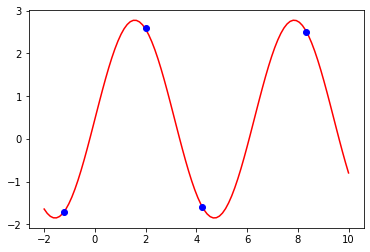

In [10]:
points = [[2, 2.6], [-1.22, -1.7], [8.32, 2.5], [4.23, -1.6]]
x = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])

A = np.vstack([np.ones(x.shape[0]), np.sin(x)]).T
solution = LA.lstsq(A, y.T, rcond=None)
a, b = solution[0]
rss = solution[1][0]

print('a =', a, 'b =', b)
print('rss = ', rss)

t_points = np.linspace(-2, 10, 100)
t_values = a + b * np.sin(t_points)
plt.plot(t_points, t_values, color='red')
plt.plot(x, y, 'o', color='blue')
plt.show()

**5.** U datoteci *social_reach.csv* se nalaze cene reklamiranja za različite demografske grupe, koje su date u hiljadama evra za 1000 pregleda. Svaka od tri kolone označava različitu platformu za reklamiranje (na primer, platforme mogu biti Facebook, Instagram ili YouTube). Svaki red označava različitu demografsku grupu, koja može npr. biti posebna država u kojoj se reklama plasira. Potrebno je odrediti iznos sredstava da se ostvari približno milion pregleda za svaku demografsku grupu, gledajući po svim platformama ukupno.

**Rešenje.** Najpre ćemo učitati i prikazati CSV fajl:

In [11]:
data = pd.read_csv('social_reach.csv')
data

,web1,web2,web3
0,0.97,1.86,0.41
1,1.23,2.18,0.53
2,0.80,1.24,0.62
3,1.29,0.98,0.51
4,1.10,1.23,0.69
5,0.67,0.34,0.54
6,0.87,0.26,0.62
7,1.10,0.16,0.48
8,1.92,0.22,0.71
9,1.29,0.12,0.62


Neka je $a_{ij}$, $0 \le i \le 9$, $0 \le j \le 2$ cena u hiljadama evra za 1000 pregleda za svaku od 10 demografskih grupa i svaku platformu za reklamiranje. Kako je potrebno odrediti ukupne cene za reklamiranje, potrebno je rešiti sledeći sistem jednačina:

$$\begin{bmatrix}a_{00}&a_{01}&a_{02}\\a_{10}&a_{11}&a_{12}\\ \vdots & \vdots & \vdots\\a_{90}&a_{91}&a_{92}\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} = \begin{bmatrix}1000\\1000\\\vdots\\1000\end{bmatrix}.$$

Elementi rezultujućeg vektora su 1000, jer su cene u matrici date za 1000 pregleda, a potrebno je ostvariti milion pregleda. Za svaku demografsku grupu $i$, potrebno je odrediti koeficijente $x_1,x_2,x_3$ tako da važi $a_{i0}x_1+a_{i1}x_2+a_{i2}x_3 \approx 1000$, pa se koeficijenti mogu približno odrediti metodom najmanjih kvadrata.

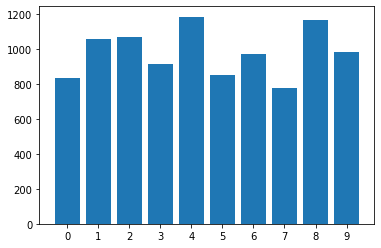

In [12]:
A = data[['web1', 'web2', 'web3']]
b = 1000 * np.ones(A.shape[0])
x, _, _, _ = LA.lstsq(A, b, rcond=None)
result = pd.Series(np.dot(A, x))
plt.xticks(np.linspace(0, 9, 10))
plt.bar(result.index, result.values)
plt.show()

Na prethodnom grafiku je prikazan ukupan broj u hiljadama pregleda za svaku demografsku grupu. Ukupna cena koja je plaćena za demografsku grupu $i$ iznosi $a_{i0}x_1+a_{i1}x_2+a_{i2}x_3$ hiljada dolara, gde su vrednosti koordinata vektora $x$ jednake:

In [13]:
print('x1 =', x[0])
print('x2 =', x[1])
print('x3 =', x[2])

x1 = 62.07662454385008
x2 = 99.98500402826238
x3 = 1442.8374625412225
